AUC: 0.79
Accuracy: 0.94


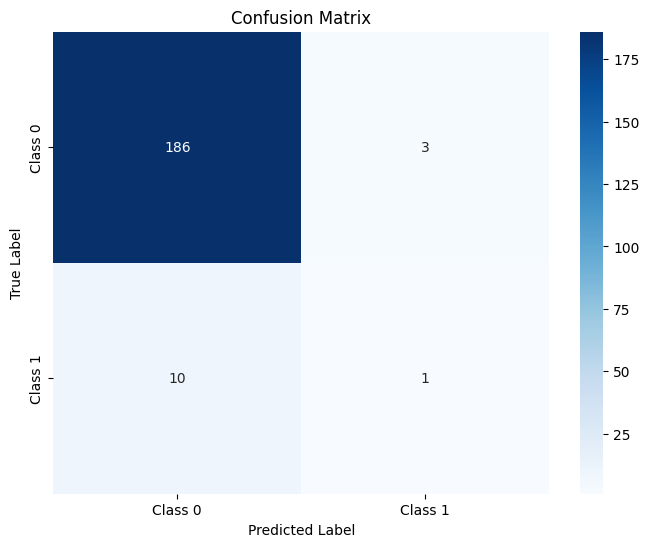

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 生成一个二分类数据集
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建一个逻辑回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测测试集的概率
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.2f}")

# 预测测试集的类别
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)


# 绘制混淆矩阵图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

# # 生成一个极度不平衡的武侠数据集
# # 假设特征表示武功修炼时间、战斗胜率等，标签表示是否为高手
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=42)

# # 将数据集分为训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # 创建一个总是预测普通弟子的模型

# def predict(X):
#     return np.zeros(X.shape[0])

# # 训练和预测

# y_pred = predict(X_test)

# # 计算混淆矩阵和准确率
# cm = confusion_matrix(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)

# # 计算 ROC 曲线和 AUC
# # 在这里我们需要一个概率预测来计算 ROC 曲线和 AUC，为了演示，我们假设模型输出的是一个常量概率
# y_pred_prob = np.zeros(X_test.shape[0])
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# auc = roc_auc_score(y_test, y_pred_prob)

# # 可视化结果
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.title("混淆矩阵")
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.colorbar()
# plt.xlabel("预测标签")
# plt.ylabel("真实标签")
# plt.xticks([0, 1], ["普通弟子", "高手"])
# plt.yticks([0, 1], ["普通弟子", "高手"])
# for i in range(2):
#     for j in range(2):
#         plt.text(j, i, cm[i, j], ha="center", va="center", color="red")


# print(f"准确率: {accuracy:.2f}")
# print(f"AUC: {auc:.2f}")

Average Precision: 0.48


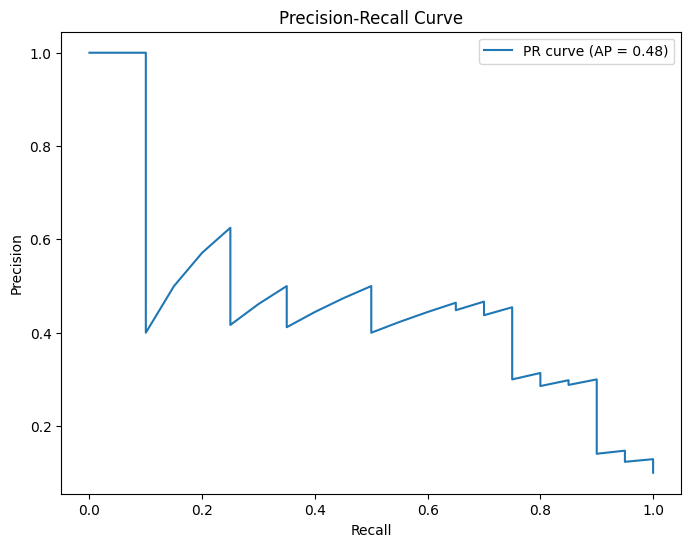

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 生成一个二分类数据集
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建一个逻辑回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测测试集的概率
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算Precision和Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# 计算平均精确率
average_precision = average_precision_score(y_test, y_pred_proba)
print(f"Average Precision: {average_precision:.2f}")

# 绘制PR曲线
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [2]:
import numpy as np
from sklearn import metrics

##给定的真实y 和 预测pred
y    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])
pred = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505,0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.3, 0.1])

numerator = 0    #分子
denominator = 0  #分母

for i in range(0, len(y)-1):
    for j in range(i, len(y)):
        if y[i] != y[j]:
            denominator += 1
            #统计所有正负样本对中，模型把相对位置排序正确的数量
            if(y[i]>y[j] and pred[i]>pred[j]) or (y[i]<y[j] and pred[i]<pred[j]):
                numerator += 1

print("AUC =" , numerator/denominator)

AUC = 0.68


In [3]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
print(metrics.auc(fpr, tpr))

0.6799999999999999


In [1]:
import numpy as np
from sklearn import metrics

##给定的真实y 和 预测pred
y    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
pred = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])

numerator = 0    #分子
denominator = 0  #分母

for i in range(0, len(y)-1):
    for j in range(i, len(y)):
        if y[i] != y[j]:
            denominator += 1
            #统计所有正负样本对中，模型把相对位置排序正确的数量
            if(y[i]>y[j] and pred[i]>pred[j]) or (y[i]<y[j] and pred[i]<pred[j]):
                numerator += 1

print("AUC =" , numerator/denominator)

AUC = 0.6666666666666666


## scikit-learn的实现

In [4]:
from sklearn import metrics
y    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
pred = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
print(metrics.auc(fpr, tpr))

0.7083333333333333


In [3]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


def auc_calculate(labels,preds,n_bins=100):
    postive_len = sum(labels)   #正样本数量（因为正样本都是1）
    negative_len = len(labels) - postive_len #负样本数量
    total_case = postive_len * negative_len #正负样本对
    pos_histogram = [0 for _ in range(n_bins)] 
    neg_histogram = [0 for _ in range(n_bins)]
    bin_width = 1.0 / n_bins
    for i in range(len(labels)):
        nth_bin = int(preds[i]/bin_width)
        if labels[i]==1:
            pos_histogram[nth_bin] += 1
        else:
            neg_histogram[nth_bin] += 1
    accumulated_neg = 0
    satisfied_pair = 0
    for i in range(n_bins):
        satisfied_pair += (pos_histogram[i]*accumulated_neg + pos_histogram[i]*neg_histogram[i]*0.5)
        accumulated_neg += neg_histogram[i]
    return satisfied_pair / float(total_case)

if __name__ == '__main__':
    y    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
    pred = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])

    fpr, tpr, thresholds = roc_curve(y, pred, pos_label=1)
    print("sklearn:",auc(fpr, tpr))
    print("验证:",auc_calculate(y,pred))

sklearn: 0.7083333333333333
验证: 0.7083333333333334
